In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

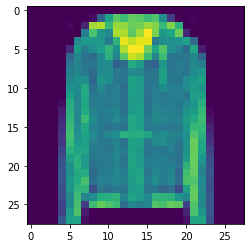

In [3]:
# Plotting a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[28])

In [4]:
# Checking our samples label
train_labels[7]

2

In [5]:
# as our sample labels are in numeric format we will change them into human readale format
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

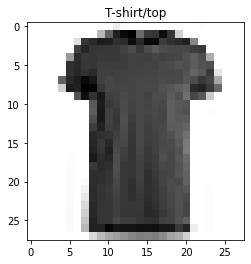

In [6]:
# Now lot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

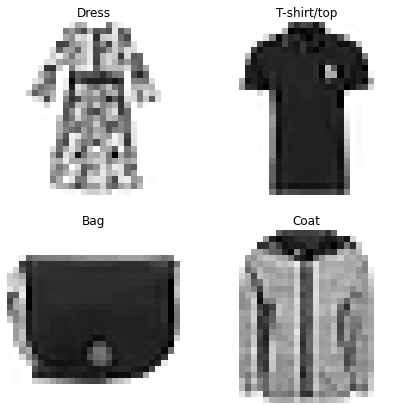

In [7]:
#plotting the random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [8]:
# Let's check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [10]:
tf.random.set_seed(28)
#creating the model
mod=tf.keras.Sequential([
                         #as input shape is in 28X28 format we are squashing them into 28X28 format
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(10,activation="softmax")
])
#compiling the model
mod.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=["accuracy"])
#fit the model
history=mod.fit(train_data,
                train_labels,
                epochs=10,
                validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.3752 - accuracy: 0.0997 - val_loss: 2.2952 - val_accuracy: 0.1034
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2761 - accuracy: 0.1117 - val_loss: 2.4346 - val_accuracy: 0.1397
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1635 - accuracy: 0.1521 - val_loss: 2.0316 - val_accuracy: 0.1960
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8468 - accuracy: 0.2215 - val_loss: 1.7381 - val_accuracy: 0.2479
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7267 - accuracy: 0.2481 - val_loss: 1.6949 - val_accuracy: 0.2668
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6966 - accuracy: 0.2594 - val_loss: 1.6955 - val_accuracy: 0.2625
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6713 - accuracy: 0.2709 - val_loss: 1.6761 - val_accuracy:

In [11]:
mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Check the min and max values of the training data to do normalization
train_data.min(), train_data.max()

(0, 255)

In [13]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [14]:
tf.random.set_seed(28)
#creating the model
norm_mod=tf.keras.Sequential([
                         #as input shape is in 28X28 format we are squashing them into 28X28 format
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(10,activation="softmax")
])
#compiling the model
norm_mod.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=["accuracy"])
#fit the model
norm_history=norm_mod.fit(train_data,
                train_labels,
                epochs=10,
                validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2910 - accuracy: 0.5130 - val_loss: 1.0027 - val_accuracy: 0.6208
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8813 - accuracy: 0.6689 - val_loss: 0.8321 - val_accuracy: 0.6819
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7856 - accuracy: 0.7207 - val_loss: 0.7738 - val_accuracy: 0.7315
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7371 - accuracy: 0.7381 - val_loss: 0.7373 - val_accuracy: 0.7428
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7113 - accuracy: 0.7422 - val_loss: 0.7211 - val_accuracy: 0.7426
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6971 - accuracy: 0.7459 - val_loss: 0.7106 - val_accuracy: 0.7448
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6860 - accuracy: 0.7497 - val_loss: 0.7182 - val_accuracy:

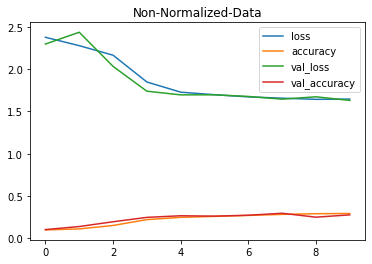

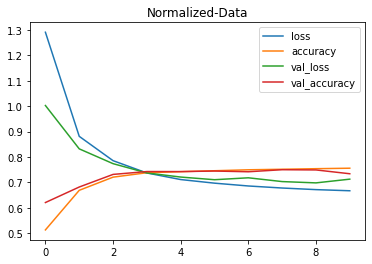

In [15]:
#let's plot each plot history(loss curves)
import pandas as pd
pd.DataFrame(history.history).plot(title="Non-Normalized-Data")
pd.DataFrame(norm_history.history).plot(title="Normalized-Data")

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding the ideal learning rate')

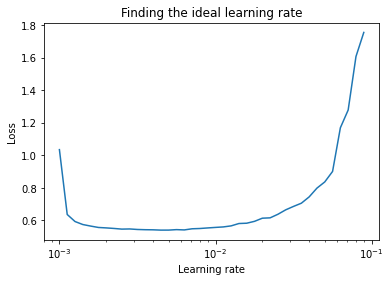

In [17]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [18]:
#we can see that at 0.001 the curve started decreasing which is ADAM optimizer's default learning rate
#let's refit a model using ideal learning rate
# Set random seed
tf.random.set_seed(42)

# Create the model
lr_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
lr_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = lr_model.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [19]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [20]:
# Make predictions with the most recent model
y_probs = lr_model.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[8.56305374e-11, 3.53622649e-13, 2.66338247e-05, 4.63565968e-08,
        5.09496022e-05, 9.61195901e-02, 8.17779551e-08, 9.18693542e-02,
        4.06053849e-03, 8.07872713e-01],
       [3.42787143e-06, 1.28995587e-16, 9.59891379e-01, 2.05162735e-07,
        1.53292520e-02, 2.45320095e-13, 2.41429582e-02, 1.13834473e-28,
        6.32718555e-04, 4.47891253e-08],
       [6.10625430e-05, 9.96576846e-01, 4.38669829e-08, 3.34057584e-03,
        1.32495752e-05, 1.43834915e-21, 8.27904660e-06, 7.32397047e-18,
        5.48114016e-08, 4.92255264e-14],
       [7.50320760e-05, 9.90536869e-01, 4.25295440e-07, 9.22322087e-03,
        1.36234143e-04, 1.82770664e-18, 2.68087279e-05, 4.81261149e-14,
        1.45217291e-06, 2.22119666e-11],
       [7.21898302e-02, 1.54957138e-06, 2.55669415e-01, 1.03630936e-02,
        4.35413457e-02, 1.10696134e-13, 6.16929829e-01, 6.75448897e-23,
        1.30492181e-03, 1.21403532e-09]], dtype=float32)

In [21]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [22]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [25]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)
#as this confusion matrix is hard to understand

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

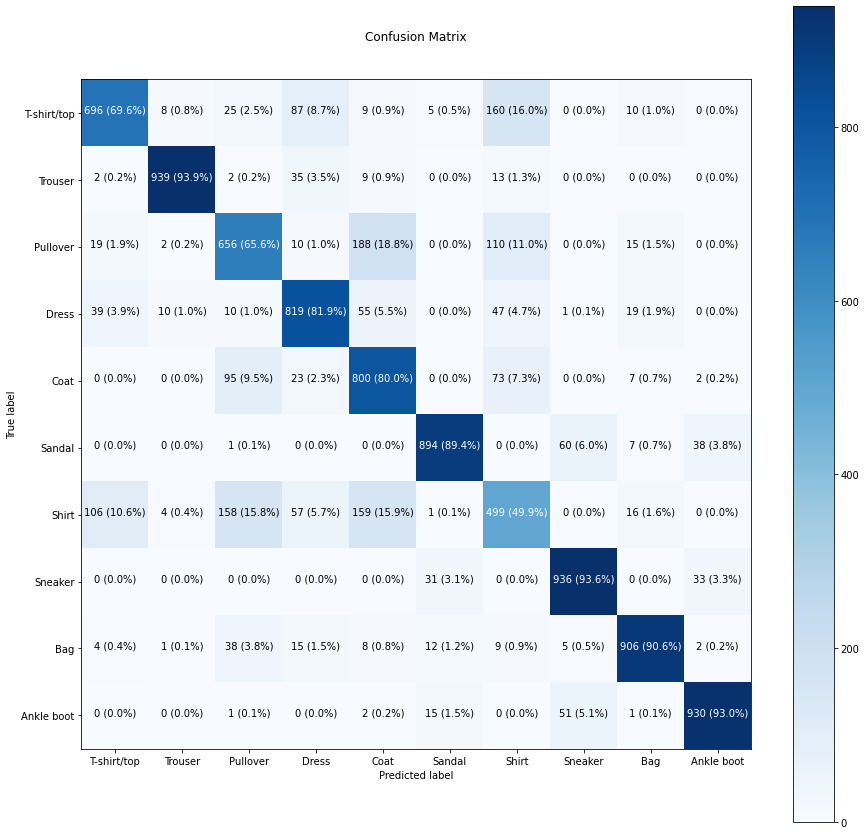

In [24]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [34]:
# create a function for plotting a random image along with its prediction
import random
def rand_image(model,images,true_labels,classes):
  i=random.randint(0,len(images))
  # create predictions and targts
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]
  #plot the target image
  plt.imshow(target_image,cmap=plt.cm.binary)

  #change the color of titles depending upon prediction is right or wrong
  if pred_label == true_label:
    color="green"
  else:
    color="red"
    #adding xlabel information about prediction
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),color=color)
               

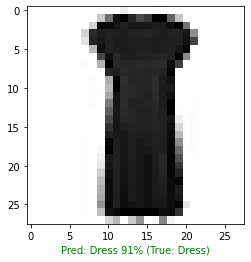

In [37]:
#check random image alon with it's prediction
rand_image(model=lr_model,
           images=test_data,
           true_labels=test_labels,
           classes=class_names)

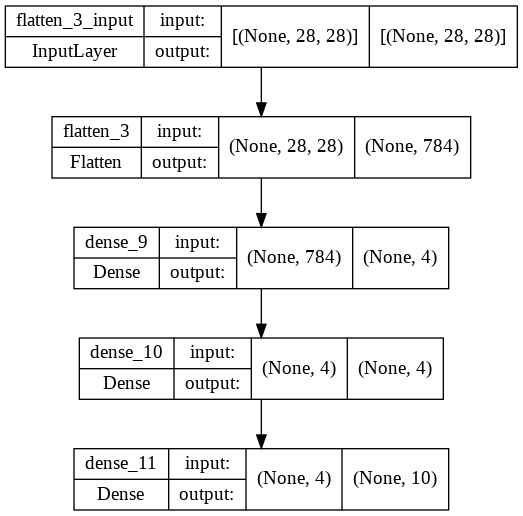

In [42]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(lr_model, show_shapes=True)